# Student Mental Health Analysis

This project conducts an analysis of students mental health

![studentmental.png](https://i.imgur.com/2vtOqFv.png)

## Data Processing

### Importing Necessary Libraries and Reading the Dataset

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support

from scipy.stats import mannwhitneyu

from factor_analyzer import FactorAnalyzer

### Loading the Dataset

In [3]:
data=pd.read_csv("student_mental_health.csv")
data.columns=['Timestamp','Gender','Age','Course','Year_of_Study','CGPA','Marital_Status','Depression','Anxiety','Panic_Atack','Treatment']

#### Basic data structural analysis: Initial review, data types, missing values

In [4]:
data.head()

,Timestamp,Gender,Age,Course,Year_of_Study,CGPA,Marital_Status,Depression,Anxiety,Panic_Atack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       101 non-null    object 
 1   Gender          101 non-null    object 
 2   Age             100 non-null    float64
 3   Course          101 non-null    object 
 4   Year_of_Study   101 non-null    object 
 5   CGPA            101 non-null    object 
 6   Marital_Status  101 non-null    object 
 7   Depression      101 non-null    object 
 8   Anxiety         101 non-null    object 
 9   Panic_Atack     101 non-null    object 
 10  Treatment       101 non-null    object 
dtypes: float64(1), object(10)
memory usage: 8.8+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100.0,20.53,2.49628,18.0,18.0,19.0,23.0,24.0


In [7]:
data.isnull().sum()

Timestamp         0
Gender            0
Age               1
Course            0
Year_of_Study     0
CGPA              0
Marital_Status    0
Depression        0
Anxiety           0
Panic_Atack       0
Treatment         0
dtype: int64

## Data preprocessing and Visualization

In [8]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [9]:
data['Timestamp']=pd.to_datetime(data['Timestamp'])

In [10]:
data['Year_of_Study'] = data['Year_of_Study'].astype(str).str.extract('(\d+)').astype(int)

In [11]:
def calculate_cgpa(x):
    if isinstance(x,str):
        first,second=x.split('-')
        return (float(first.strip())+float(second.strip()))/2
    else:
        return x
data['CGPA']=data['CGPA'].apply(calculate_cgpa)

In [12]:
le=LabelEncoder()
cat_cols=['Gender','Marital_Status','Depression','Anxiety','Panic_Atack','Treatment']

for col in cat_cols:
    data[col]=le.fit_transform(data[col])
data

,Timestamp,Gender,Age,Course,Year_of_Study,CGPA,Marital_Status,Depression,Anxiety,Panic_Atack,Treatment
0,2020-08-07 12:02:00,0,18.0,Engineering,1,3.245,0,1,0,1,0
1,2020-08-07 12:04:00,1,21.0,Islamic education,2,3.245,0,0,1,0,0
2,2020-08-07 12:05:00,1,19.0,BIT,1,3.245,0,1,1,1,0
3,2020-08-07 12:06:00,0,22.0,Laws,3,3.245,1,1,0,0,0
4,2020-08-07 12:13:00,1,23.0,Mathemathics,4,3.245,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,2020-07-13 19:56:49,0,21.0,BCS,1,3.750,0,0,1,0,0
97,2020-07-13 21:21:42,1,18.0,Engineering,2,3.245,0,1,1,0,0
98,2020-07-13 21:22:56,0,19.0,Nursing,3,3.750,1,1,0,1,0
99,2020-07-13 21:23:57,0,23.0,Pendidikan Islam,4,3.750,0,0,0,0,0


In [13]:
print("Depression Benzersiz Değerler:", data['Depression'].unique())
print("Anxiety Benzersiz Değerler:", data['Anxiety'].unique())
print("Panic_Atack Benzersiz Değerler:", data['Panic_Atack'].unique())


Depression Benzersiz Değerler: [1 0]
Anxiety Benzersiz Değerler: [0 1]
Panic_Atack Benzersiz Değerler: [1 0]


### Data Visualization: Histograms, Box Plots, Correlation Matrix

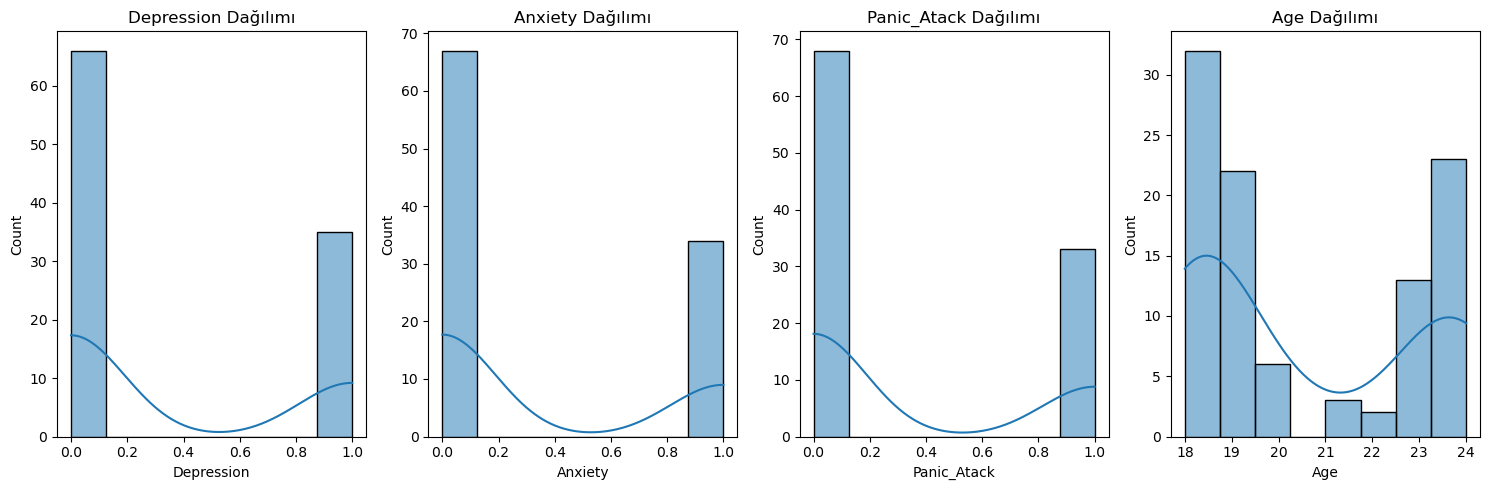

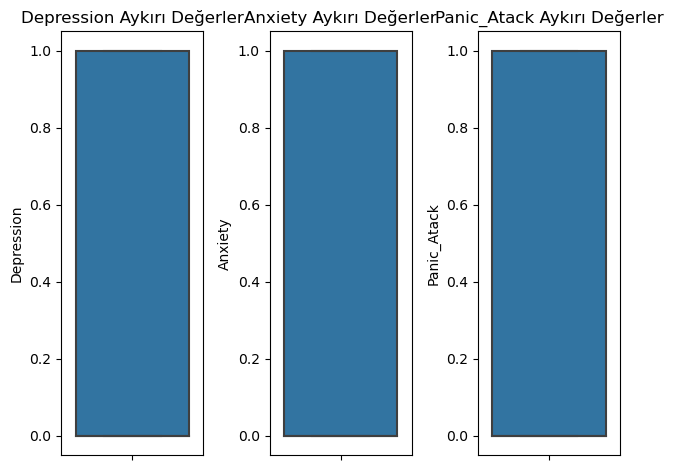

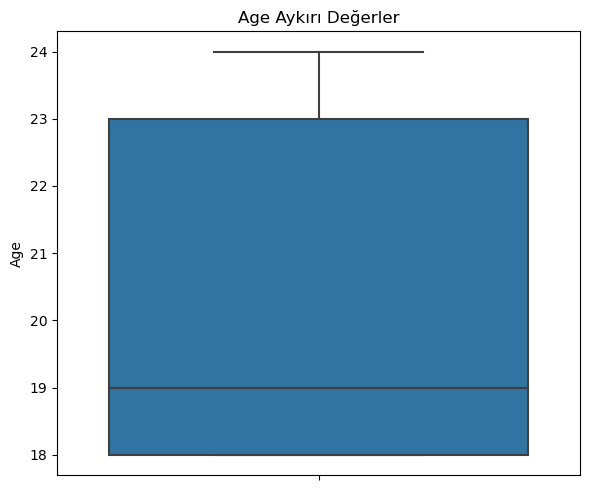

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.histplot(data['Depression'], kde=True)
plt.title('Depression Dağılımı')

plt.subplot(1, 4, 2)
sns.histplot(data['Anxiety'], kde=True)
plt.title('Anxiety Dağılımı')

plt.subplot(1, 4, 3)
sns.histplot(data['Panic_Atack'], kde=True)
plt.title('Panic_Atack Dağılımı')

plt.subplot(1, 4, 4)
sns.histplot(data['Age'], kde=True)
plt.title('Age Dağılımı')

plt.tight_layout()
plt.show()

plt.subplot(1, 3, 1)
sns.boxplot(y=data['Depression'])
plt.title('Depression Aykırı Değerler')

plt.subplot(1, 3, 2)
sns.boxplot(y=data['Anxiety'])
plt.title('Anxiety Aykırı Değerler')

plt.subplot(1, 3, 3)
sns.boxplot(y=data['Panic_Atack'])
plt.title('Panic_Atack Aykırı Değerler')

plt.tight_layout()
plt.show()

# Age Sütunu İçin Aykırı Değerler
plt.figure(figsize=(6, 5))
sns.boxplot(y=data['Age'])
plt.title('Age Aykırı Değerler')
plt.tight_layout()
plt.show()

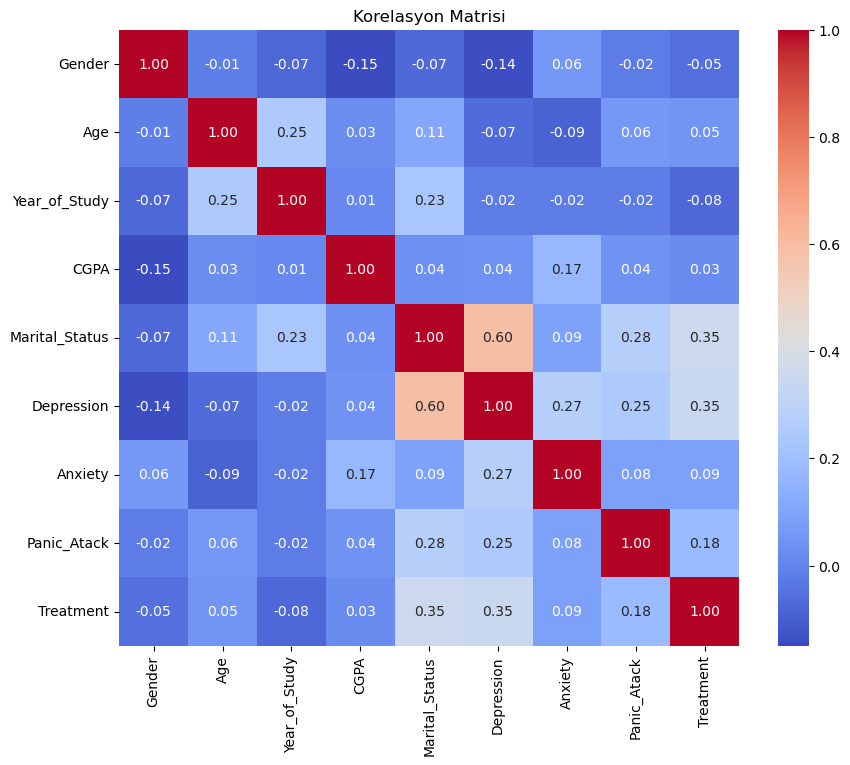

In [15]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})
plt.title('Korelasyon Matrisi')
plt.show()

### Application of statistical tests(T-test, Mann-Whitney U Testi)

In [16]:
male_group=data[data['Gender']==1]['Depression']
female_group=data[data['Gender']==0]['Depression']
male_group
from scipy.stats import ttest_ind, f_oneway
t_statistic,p_value=ttest_ind(male_group,female_group)

print('Cinsiyetlere göre depresyon seviyeleri için T-testi istatistiği',t_statistic)
print('p-değeri',p_value)

Cinsiyetlere göre depresyon seviyeleri için T-testi istatistiği -1.4400225560575386
p-değeri 0.15301587298605562


In [17]:
age_18_21_group=data[(data['Age']>=18) & (data['Age']<=21)]['Depression']
age_22_25_group=data[(data['Age']>22) & (data['Age']<=25)]['Depression']

t_statistic_age,p_value_age=ttest_ind(age_18_21_group,age_22_25_group)

print(f'18-21 ve 22-25 yaş aralıkları için T-testi istatistiği: {t_statistic_age}')
print(f'p-değeri: {p_value_age}')

18-21 ve 22-25 yaş aralıkları için T-testi istatistiği: 0.5949671328924689
p-değeri: 0.553250865093454


In [18]:
engineering_group = data[data['Course'] == 'Engineering']['Depression']
mathematics_group = data[data['Course'] == 'Mathemathics']['Depression']

statistic, p_value = mannwhitneyu(engineering_group, mathematics_group)
print(f'Mann-Whitney U Testi istatistiği: {statistic}')
print(f'p-değeri: {p_value}')

Mann-Whitney U Testi istatistiği: 12.0
p-değeri: 0.4941245444092638


## Factor Analysis and Deep Data Review

### Deeper examination of the dataset and understanding the relationships between attributes

In [19]:
le_course = LabelEncoder()

data['Course'] = le_course.fit_transform(data['Course'])
vars=['Marital_Status','Course','CGPA','Depression','Anxiety','Panic_Atack']

sub_data=data[vars]

from factor_analyzer import FactorAnalyzer
fc=FactorAnalyzer(n_factors=3,rotation='varimax')
fc.fit(sub_data)
factors=fc.loadings_

print(factors)

[[ 0.81507116 -0.02117678  0.07003626]
 [ 0.12338751 -0.07193333  0.53122983]
 [ 0.01887029  0.16192191  0.2430294 ]
 [ 0.73326011  0.17286707  0.02424185]
 [ 0.13760142  0.98750287  0.03782123]
 [ 0.32614851  0.03400206  0.13789601]]


## Machine Learning Modeling and Performance Evaluation

#### Determination of dependent and independent variables

In [20]:
X=data[['Marital_Status','Course','CGPA','Anxiety','Panic_Atack']]
y=data['Depression']

### Training machine learning models

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC()
}
from sklearn.metrics import precision_recall_fscore_support
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}\n")

performance_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision_0', 'Precision_1', 'Recall_0', 'Recall_1', 'F1-score_0', 'F1-score_1'])

performance_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision_0', 'Precision_1', 'Recall_0', 'Recall_1', 'F1-score_0', 'F1-score_1'])

Model: Decision Tree
Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.55      0.75      0.63         8

    accuracy                           0.67        21
   macro avg       0.67      0.68      0.66        21
weighted avg       0.70      0.67      0.67        21


Model: Logistic Regression
Accuracy: 0.7619047619047619
Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        13
           1       1.00      0.38      0.55         8

    accuracy                           0.76        21
   macro avg       0.86      0.69      0.69        21
weighted avg       0.83      0.76      0.73        21


Model: Support Vector Machine
Accuracy: 0.47619047619047616
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.77      0.65        13


### Visualization of results and presentation of performance metrics in a table

In [22]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, predictions, average=None)
    
    performance_df = pd.concat([performance_df, pd.DataFrame({
        'Model': [name],
        'Accuracy': [accuracy],
        'Precision_0': [precision[0]],
        'Precision_1': [precision[1]],
        'Recall_0': [recall[0]],
        'Recall_1': [recall[1]],
        'F1-score_0': [fscore[0]],
        'F1-score_1': [fscore[1]]
    })])

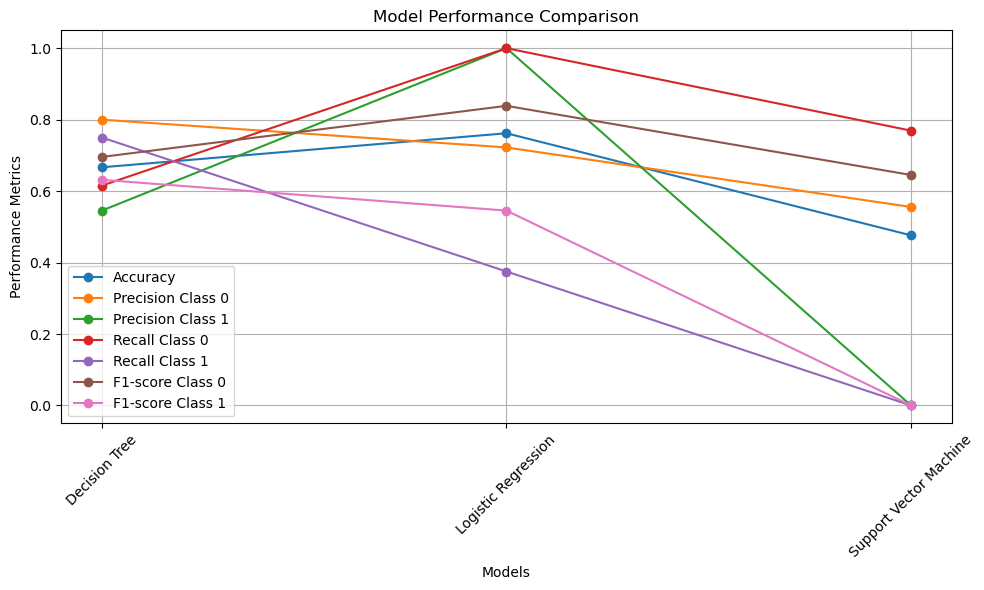

Performance Metrics for Models:
                    Model  Accuracy  Precision_0  Precision_1  Recall_0  \
0           Decision Tree  0.666667     0.800000     0.545455  0.615385   
0     Logistic Regression  0.761905     0.722222     1.000000  1.000000   
0  Support Vector Machine  0.476190     0.555556     0.000000  0.769231   

   Recall_1  F1-score_0  F1-score_1  
0     0.750    0.695652    0.631579  
0     0.375    0.838710    0.545455  
0     0.000    0.645161    0.000000  


In [23]:

plt.figure(figsize=(10, 6))

plt.plot(performance_df['Model'], performance_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(performance_df['Model'], performance_df['Precision_0'], marker='o', label='Precision Class 0')
plt.plot(performance_df['Model'], performance_df['Precision_1'], marker='o', label='Precision Class 1')
plt.plot(performance_df['Model'], performance_df['Recall_0'], marker='o', label='Recall Class 0')
plt.plot(performance_df['Model'], performance_df['Recall_1'], marker='o', label='Recall Class 1')
plt.plot(performance_df['Model'], performance_df['F1-score_0'], marker='o', label='F1-score Class 0')
plt.plot(performance_df['Model'], performance_df['F1-score_1'], marker='o', label='F1-score Class 1')

plt.xlabel('Models')
plt.ylabel('Performance Metrics')
plt.title('Model Performance Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Creating a table
print("Performance Metrics for Models:")
print(performance_df)